<p style="text-align: center;"><b>DSA312 Data Science with Python</b></p>
<p style="text-align: center;"><b>Author: Jing Rong GOH</b></p>
<p style="text-align: center;"><b>Assignment 2</b></p>
<p style="text-align: center;"><b>Note: This assignment has 7 questions (Q1-Q5 are 10 marks each, Q6-Q7 are 5 marks each)</b></p>
<p style="text-align: center;"><b>Note: Points may be deducted for overly verbose or inefficient code. Bonus credit will be awarded for concise and elegant solutions.</b></p>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Q1
Using the Breast Cancer dataset (`load_breast_cancer`) from `sklearn.datasets`, perform a logistic regression (without regularization) to predict whether a tumor is benign or malignant (`target`) based on the features: `mean radius`, `mean texture`, and `mean perimeter`. Where necessary, set seed values and/or random_state to `1`; set max_iter=`10000`.

##### (a) Use the model specification above to fit the entire Breast Cancer dataset. Using the fitted model, get the corresponding predicted `target` values and subsequently generate the confusion matrix. From the Confusion Matrix, report the True Positive, True Negative, False Positive and False Negative values.
##### (b) Use the values from the confusion matrix in `Q1a` to calculate the F1 score manually using the F1 Score formula. In addition, use an appropriate function from `sklearn` to compute the corresponding F1 score. Compare the two calculated F1 scores. Are they the same or different? Explain why.
##### (c) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Fit the logistic regression model (without regularization) using the training set. Calculate and report the F1-score on the validation set.
##### (d) Fit a Lasso Logistic Regression model (L1 regularization) with a penalty of `C = 0.6`. What is the F1 Score of the Lasso Logistic Regression model on the validation set?
##### (e) Based on the F1 Scores, which model (with or without regularization) performs better on the validation set?
##### (f) For the Lasso Logistic Regression model (L1 regularization), change the penalty to `C = 1e99`. What do you expect the resulting F1 Score to be on the validation set? Is the actual result aligned with your expectation? Explain your answer.

In [2]:
# Q1
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [3]:
# Q1a
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Select mean radius, mean perimeter as IVs and the target as the DV (ndarray)
X = df[['mean radius', 'mean texture','mean perimeter']].values  # Features: mean radius, mean perimeter
y = df['target'].values                           # Target: Binary classification (malignant (1) or benign (0))

# Initialize and fit the logistic regression model
model = LogisticRegression(penalty = None, random_state = 1)        # By default, penalty is l2 (i.e. ridge)
model.fit(X, y)


# Fitted / Predicted y values: Default Threshold is 0.5
y_pred = model.predict(X)                  

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))       # Row wise is actual while column wise is predicted
# Answer: True Positive: 339 , True Negative: 184 , False Positive: 28 , False Negative: 18

LogisticRegression(penalty=None, random_state=1)

Confusion Matrix:
 [[184  28]
 [ 18 339]]


In [4]:
# Q1b
# Manual
F1 = (339)/(339+0.5*(28+18))
F1

print(f"F1 Score: {f1_score(y, y_pred)}")
# Answer: 0.93646408839779

0.93646408839779

F1 Score: 0.93646408839779


In [5]:
# Q1c
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Select mean radius, mean perimeter as IVs and the target as the DV (ndarray)
X = df[['mean radius', 'mean texture','mean perimeter']].values  # Features: mean radius, mean perimeter
y = df['target'].values                           

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
# Initialize and fit the logistic regression model
model = LogisticRegression(penalty = None, random_state = 1)        # By default, penalty is l2 (i.e. ridge)
model.fit(X_train, y_train)

# Predict the target values for the validation set
y_pred = model.predict(X_val)

print(f"F1 Score: {f1_score(y_val, y_pred)}")

# Answer: 0.9041095890410958

LogisticRegression(penalty=None, random_state=1)

F1 Score: 0.9041095890410958


In [6]:
# Q1d
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Select mean radius, mean perimeter as IVs and the target as the DV (ndarray)
X = df[['mean radius', 'mean texture','mean perimeter']].values  # Features: mean radius, mean perimeter
y = df['target'].values                           

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
# Initialize and fit the logistic regression model
model = LogisticRegression(penalty = 'l1', 
                           C = 0.6, 
                           solver = 'liblinear', 
                           max_iter = 10000,
                           random_state = 1)
model.fit(X_train, y_train)

# Predict the target values for the validation set
y_pred = model.predict(X_val)

print(f"F1 Score: {f1_score(y_val, y_pred)}")
# Answer: 0.9140271493212669

LogisticRegression(C=0.6, max_iter=10000, penalty='l1', random_state=1,
                   solver='liblinear')

F1 Score: 0.9140271493212669


In [41]:
# Q1e

# Answer: The model with regularisation as the F1 score is greater than the F1 score under the model without.

1e+99

In [7]:
# Q1f
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Select mean radius, mean perimeter as IVs and the target as the DV (ndarray)
X = df[['mean radius', 'mean texture','mean perimeter']].values  # Features: mean radius, mean perimeter
y = df['target'].values                           

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
# Initialize and fit the logistic regression model
model = LogisticRegression(penalty = 'l1', 
                           C = 1e99, 
                           solver = 'liblinear', 
                           max_iter = 10000,
                           random_state = 1)
model.fit(X_train, y_train)

# Predict the target values for the validation set
y_pred = model.predict(X_val)

print(f"F1 Score: {f1_score(y_val, y_pred)}")
 
# Answer: The F1 score here will be similar to the F1 score in the model without regularisation. Since "C" parameter, which is inverse of  λ is set very large, the regularisation approaches 0.

LogisticRegression(C=1e+99, max_iter=10000, penalty='l1', random_state=1,
                   solver='liblinear')

F1 Score: 0.9041095890410958


### Q2
Use the California housing dataset (`fetch_california_housing`) from `sklearn.datasets` for this question, the objective is to predict the median house price `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `1`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.
##### (a) Use the entire dataset to generate a simple decision tree with a maximum depth of 3. Visualize the tree structure and its decision boundaries.
##### (b) Using the decision tree from `Q2a`, state the average value of the median house price in the dataset.
##### (c) Using the decision tree from `Q2a`, calculate the Sum Squared Residuals (SSR) at the root node (i.e. top node). Calculate the Sum Squared Residuals (SSR) at the leaf nodes (i.e. terminal nodes). Calculate the corresponding percentage reduction in SSR between the root and leaf nodes.
##### (d) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the decision tree from `Q2a` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.
##### (e) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Fit a full decision tree (i.e. no need to set `max_depth`) on the training data. Calculate and report the MSE on the validation set.
##### (f) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform Bagging (using 200 trees) on the training data. Calculate and report the MSE on the validation set.
##### (g) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform Random Forest (using 200 trees) on the training data. Calculate and report the MSE on the validation set.
##### (h) Which model above is the best? Why? What is the most important feature in this best model?.

In [8]:
# Q2 Load Libraries Here
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

DecisionTreeRegressor(max_depth=3, random_state=1)

Mean Squared Error with max_depth=2: 0.6203646616157066


<Figure size 2000x1000 with 0 Axes>

[Text(0.5, 0.875, 'MedInc <= 5.035\nsquared_error = 1.332\nsamples = 20640\nvalue = 2.069'),
 Text(0.25, 0.625, 'MedInc <= 3.074\nsquared_error = 0.837\nsamples = 16255\nvalue = 1.735'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'AveRooms <= 4.314\nsquared_error = 0.561\nsamples = 7860\nvalue = 1.357'),
 Text(0.0625, 0.125, 'squared_error = 0.67\nsamples = 3317\nvalue = 1.62'),
 Text(0.1875, 0.125, 'squared_error = 0.394\nsamples = 4543\nvalue = 1.165'),
 Text(0.375, 0.375, 'AveOccup <= 2.373\nsquared_error = 0.837\nsamples = 8395\nvalue = 2.089'),
 Text(0.3125, 0.125, 'squared_error = 1.291\nsamples = 1954\nvalue = 2.79'),
 Text(0.4375, 0.125, 'squared_error = 0.505\nsamples = 6441\nvalue = 1.876'),
 Text(0.75, 0.625, 'MedInc <= 6.82\nsquared_error = 1.221\nsamples = 4385\nvalue = 3.306'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'AveOccup <= 2.743\nsquared_error = 0.891\nsamples = 3047\nvalue = 2.906'),
 Text(0.5625, 0.125, 'squared_error = 1.006\nsamples = 1260\nva

Text(0.5, 1.0, 'Decision Tree for California Housing Dataset (max_depth=3)')

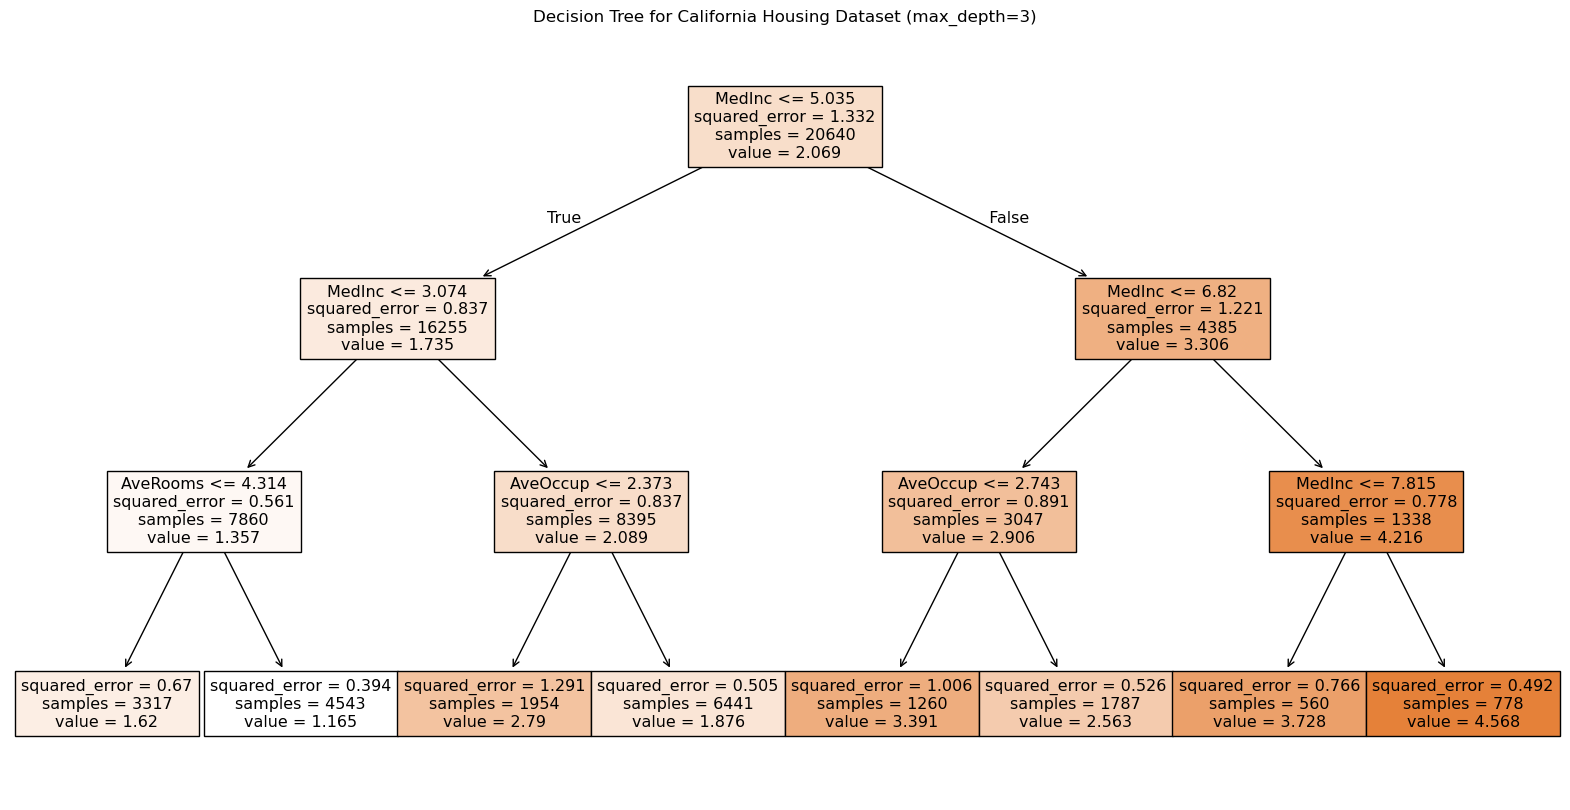

In [9]:
# Q2a
# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Initialize and Fit the Decision Tree regressor with max_depth of 2
tree_model = DecisionTreeRegressor(max_depth=3, random_state=1)       # Max_depth refers to how deep you want the tree to be split
                                                                       # Other stopping criterion can be added as well
tree_model.fit(X, y)

# Make predictions using the trained model
y_pred = tree_model.predict(X)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error with max_depth=2: {mse}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=data.feature_names, filled=True)    # filled = True adds color, where color intensity increases with the mean response value
plt.title("Decision Tree for California Housing Dataset (max_depth=3)")
plt.show()

In [53]:
# Q2b

# Answer: At the root node, the average value is 2.069

In [10]:
# Q2c
ssr_root_node = 1.332*20640
ssr_terminal_node = (0.67*3317) + (0.394*4543) + (1.291*1954) + (0.505*6441) + (1.006*1260) + (0.526*1787) + (0.766*560) + (0.492*778)

perc_ssr_reduction = (ssr_root_node - ssr_terminal_node)/ssr_root_node * 100

print(f"SSR at Root Node: {ssr_root_node}")
print(f"SSR at Terminal Node: {ssr_terminal_node}")
print(f"SSR reduction: {perc_ssr_reduction}%")
# Answer: SSR at Root Node: 27492.480000000003 ; SSR at Terminal Node: 12806.908999999998 ; SSR reduction: 53.416683398514806%


SSR at Root Node: 27492.480000000003
SSR at Terminal Node: 12806.908999999998
SSR reduction: 53.416683398514806%


In [11]:
# Q2d
dummy_obs = {'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}
dummy_obs = np.array([[value for key, value in dummy_obs.items() if key != 'target']])

y_pred = tree_model.predict(dummy_obs)
MSE = mean_squared_error([[2]],y_pred)

y_pred
MSE
# Answer: Predicted value = 1.8758614 ; MSE = 0.015410391524277693

array([1.8758614])

0.015410391524277693

In [12]:
# Q2e

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and fit Decision Tree Regressor on training data
full_tree = DecisionTreeRegressor(random_state=1)
full_tree.fit(X_train, y_train)

# Evaluate fitted model on validation set
y_pred = full_tree.predict(X_val)
print(f"MSE: {mean_squared_error(y_val, y_pred)}")
# Answer: MSE = 0.4952761214381298

DecisionTreeRegressor(random_state=1)

MSE: 0.4952761214381298


In [13]:
# Q2f
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

bagging_regressor = RandomForestRegressor(n_estimators=200, random_state=1)

bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_val)


mse = mean_squared_error(y_val, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")

# Answer: Mean Squared Error (MSE): 0.2583273468790679

RandomForestRegressor(n_estimators=200, random_state=1)

Mean Squared Error (MSE): 0.2583273468790679


In [14]:
# Q2g
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)


random_forest_regressor = RandomForestRegressor(n_estimators=200, random_state=1, max_features="sqrt")

random_forest_regressor.fit(X_train, y_train)

y_pred = random_forest_regressor.predict(X_val)

mse = mean_squared_error(y_val, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
# Answer: 0.2437621519036966 

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1)

Mean Squared Error (MSE): 0.2437621519036966


<BarContainer object of 8 artists>

Text(0.5, 0, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest Model')

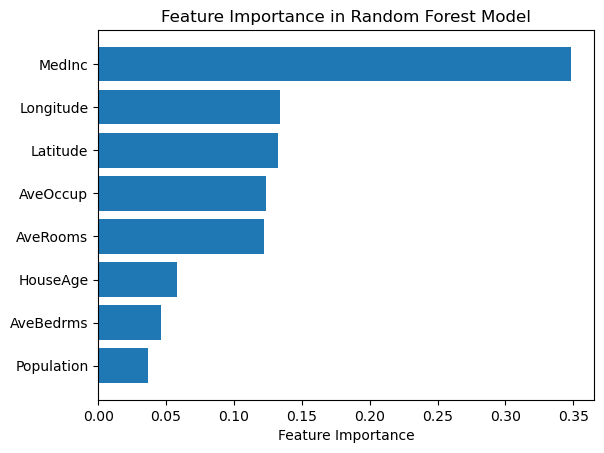

In [16]:
# Q2h
feature_importances = random_forest_regressor.feature_importances_
feature_names = data.feature_names

indices = np.argsort(feature_importances)
plt.barh(np.array(feature_names)[indices], feature_importances[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

# Answer: Random forest is the better model as it has a lower mean square error than the baggin model. MedInc is the most important feature.

### Q3
Use the California housing dataset (`fetch_california_housing`) from `sklearn.datasets` for this question, the objective is to predict the median house price `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `8`. Where applicable, ensure the data is suitably standardized. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.

##### (a) Perform a K-Nearest Neighbors (KNN) regression on the entire dataset using `K=3` and report the corresponding MSE.
##### (b) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the fitted KNN regression from `Q3a` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.
##### (c) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform a KNN regression using `K=3` on the training data. Calculate and report the MSE on the validation set.
##### (d) Perform hyperparameter tuning to find the optimal value of K for KNN, using K values ranging from 1 to 20, with 5-folds cross validation strategy. Report the optimal K and the corresponding cross-validated MSE. Fit the optimal KNN model on the training data and report the MSE on the validation set.
##### (e) Refit the optimal KNN model using the entire dataset and report the corresponding MSE.
##### (f) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the fitted optimal KNN regression from `Q3e` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.

In [17]:
# Q3 Load Libraries Here
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
# Q3a
# Load the California housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (house prices)

# Standardize the data (since KNN is sensitive to scale)
scaler = StandardScaler()
X = scaler.fit_transform(X)    # .fit_transform calculates mean & sd from training data and applies transformation on training data features

# Initialize the KNeighborsRegressor
k = 3  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fit the model
knn_regressor.fit(X, y)

# Predict on the validation set
y_pred = knn_regressor.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)

# Display the results
print(f"Mean Squared Error (MSE) for KNN Regressor with k={k}: {mse:.4f}")
# Answer: Mean Squared Error (MSE) for KNN Regressor with k=3: 0.2158

KNeighborsRegressor(n_neighbors=3)

Mean Squared Error (MSE) for KNN Regressor with k=3: 0.2158


In [20]:
# Q3b
dummy_obs = {'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}
dummy_obs = np.array([[value for key, value in dummy_obs.items() if key != 'target']])
dummy_observation_scaled = scaler.transform(dummy_obs)
y_pred = knn_regressor.predict(dummy_observation_scaled)

# Calculate metrics
mse = mean_squared_error([[2]], y_pred)
y_pred
mse
# Answer: Predicted value = 3.45067 ; MSE = 2.1044434489000006

array([3.45067])

2.1044434489000006

In [21]:
# Q3c
# Load the California housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (house prices)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

# Standardize the data (since KNN is sensitive to scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)    # .fit_transform calculates mean & sd from training data and applies transformation on training data features
X_val = scaler.transform(X_val)            # .transformed uses the mean and sd learned from the fit to apply the same transformation

# Initialize the KNeighborsRegressor
k = 3  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fit the model
knn_regressor.fit(X_train, y_train)

# Predict on the validation set
y_pred = knn_regressor.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_pred)

# Display the results
print(f"Mean Squared Error (MSE) for KNN Regressor with k={k}: {mse:.4f}")
# Answer: Mean Squared Error (MSE) for KNN Regressor with k=3: 0.4539

KNeighborsRegressor(n_neighbors=3)

Mean Squared Error (MSE) for KNN Regressor with k=3: 0.4539


In [22]:
# Q3d
# Load the California housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (house prices)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

# Create a pipeline to standardize the data and apply KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardizes the data
    ('knn', KNeighborsRegressor())  # KNN Regressor without setting neighbors yet
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': list(range(1, 21))  # Search for the best k in the range 1 to 20
}

# Define the custom K-Fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=8)  # 5-fold CV with shuffling

# Initialize GridSearchCV with the custom KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to find the best k
grid_search.fit(X_train, y_train)

# Get the best parameter for k
best_k = grid_search.best_params_['knn__n_neighbors']

# Retrieve best model
best_knn_regressor =  grid_search.best_estimator_

# Use best model to predict on the validation set
y_pred = best_knn_regressor.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_pred)

# Display the results
print(f"Optimal number of neighbors (k): {best_k}")
print(f"Best cross-validated MSE for k={best_k}: {-grid_search.best_score_:.4f}\n")
print(f"Mean Squared Error (MSE) on validation set with k={best_k}: {mse:.4f}")
# Answer: Optimal number of neighbors (k): 11 ; Cross-validated Mean Squared Error:  0.4175 ; Mean Squared Error (MSE) on validation set with k=11: 0.4191

GridSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='neg_mean_squared_error')

Optimal number of neighbors (k): 11
Best cross-validated MSE for k=11: 0.4175

Mean Squared Error (MSE) on validation set with k=11: 0.4191


In [23]:
# Q3e
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (house prices)

# Standardize the data (since KNN is sensitive to scale)
scaler = StandardScaler()
X = scaler.fit_transform(X)    # .fit_transform calculates mean & sd from training data and applies transformation on training data features

# Initialize the KNeighborsRegressor
k = 11  # Taken from above
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fit the model
knn_regressor.fit(X, y)

# Predict on the validation set
y_pred = knn_regressor.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)

# Display the results
print(f"Mean Squared Error (MSE) for KNN Regressor with k={k}: {mse:.4f}")
# Answer: Mean Squared Error (MSE) for KNN Regressor with k=11: 0.3266

KNeighborsRegressor(n_neighbors=11)

Mean Squared Error (MSE) for KNN Regressor with k=11: 0.3266


In [25]:
# Q3f
dummy_obs = {'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}
dummy_obs = np.array([[value for key, value in dummy_obs.items() if key != 'target']])
dummy_observation_scaled = scaler.transform(dummy_obs)
y_pred = knn_regressor.predict(dummy_observation_scaled)

# Calculate metrics
mse = mean_squared_error([[2]], y_pred)
y_pred
mse
# Answer: Predicted value = 3.11900182 ; MSE = 1.2521650690942159

array([3.11900182])

1.2521650690942159

### Q4.
Use the Wine dataset (`load_wine`) from `sklearn.datasets` for this question, where the objective is to perform Principal Component Analysis (PCA) on the dataset containing 13 features (i.e., chemical properties of different wines). Where applicable, ensure the data is suitably standardized.
##### (a) Perform PCA on the standardized wine dataset using all available features. How many Principal Components are generated? 
##### (b) What is the eigenvector for the Second Principal Component?
##### (c) State the loading scores for the Second Principal Component in simple English.
##### (d) Which feature is the most important in influencing the Second Principal Component? Explain your answer.
##### (e) Report the Principal Component scores for the first three observations projected onto the 2nd PC.
##### (f) What is the eigenvalue for the Second Principal Component?
##### (g) What is the proportion of total variation explained by the Second Principal Component?
##### (h) Generate a scree plot with appropriate titles and axis.

In [26]:
# Q4 Load Libraries Here
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [27]:
# Q4a.
# Load the Wine dataset
data = load_wine()
X = data.data  # Features
y = data.target  # Target 
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()        # By default, all are kept. To specify n, include input, n_component = n
principal_components = pca.fit_transform(X_scaled)
components = pca.components_
n_pcs = components.shape[1]
n_pcs
# Answer: 13 PCs

13

In [28]:
# Q4b
# Eigenvector of the second Principal Component (PC2)
pc2_eigenvector = components[1]
print(f"Eigenvector of PC2: \n{pc2_eigenvector}")

# Answer: 
# Eigenvector of PC2: 
# [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
# -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
#  0.36490283]

Eigenvector of PC2: 
[ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
 -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
  0.36490283]


In [29]:
# Q4c
# Feature names for the wine dataset
feature_names = data.feature_names

# Display PC2 loadings with corresponding feature names
for feature, loading in zip(feature_names, pc2_eigenvector):
    print(f"PC2 has a {loading:.8f} loading score on {feature}")

# Answer:
# PC2 has a 0.48365155 loading score on alcohol
# PC2 has a 0.22493093 loading score on malic_acid
# PC2 has a 0.31606881 loading score on ash
# PC2 has a -0.01059050 loading score on alcalinity_of_ash
# PC2 has a 0.29963400 loading score on magnesium
# PC2 has a 0.06503951 loading score on total_phenols
# PC2 has a -0.00335981 loading score on flavanoids
# PC2 has a 0.02877949 loading score on nonflavanoid_phenols
# PC2 has a 0.03930172 loading score on proanthocyanins
# PC2 has a 0.52999567 loading score on color_intensity
# PC2 has a -0.27923515 loading score on hue
# PC2 has a -0.16449619 loading score on od280/od315_of_diluted_wines
# PC2 has a 0.36490283 loading score on proline

PC2 has a 0.48365155 loading score on alcohol
PC2 has a 0.22493093 loading score on malic_acid
PC2 has a 0.31606881 loading score on ash
PC2 has a -0.01059050 loading score on alcalinity_of_ash
PC2 has a 0.29963400 loading score on magnesium
PC2 has a 0.06503951 loading score on total_phenols
PC2 has a -0.00335981 loading score on flavanoids
PC2 has a 0.02877949 loading score on nonflavanoid_phenols
PC2 has a 0.03930172 loading score on proanthocyanins
PC2 has a 0.52999567 loading score on color_intensity
PC2 has a -0.27923515 loading score on hue
PC2 has a -0.16449619 loading score on od280/od315_of_diluted_wines
PC2 has a 0.36490283 loading score on proline


In [227]:
# Q4d

# Answer: color_intensity is the most important as it has the highest absolute loading score

In [30]:
# Q4e
pc2_scores = principal_components[:3, 1]  
print(f"Principal Component scores for the first three observations projected onto PC2:{pc2_scores}")
# Answer: Principal Component scores for the first three observations projected onto PC2:[ 1.44346263 -0.33339289  1.0311513 ]

Principal Component scores for the first three observations projected onto PC2:[ 1.44346263 -0.33339289  1.0311513 ]


In [31]:
# Q4f
# Eigenvalues for each PC (i.e. variation captured by each PC)
explained_variance = pca.explained_variance_
print(f"Eigenvalue for PC2: \n{explained_variance[1]}\n") 
# Answer: 2.5110809296451237

Eigenvalue for PC2: 
2.5110809296451237



In [32]:
# Q4g
# Proportion of total variation explained by each PC
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Proportion of Total Variation for PC2: \n{explained_variance_ratio[1]}\n")
# Answer: Proportion of Total Variation for PC2: 0.19207490257008944

Proportion of Total Variation for PC2: 
0.19207490257008944



<Axes: xlabel='Principal Component'>

Text(0.5, 1.0, 'Scree Plot (Percentage of Variation Explained)')

Text(0, 0.5, 'Percentage of Variation Explained (%)')

Text(0.5, 0, 'Principal Components')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'PC1'),
  Text(1, 0, 'PC2'),
  Text(2, 0, 'PC3'),
  Text(3, 0, 'PC4'),
  Text(4, 0, 'PC5'),
  Text(5, 0, 'PC6'),
  Text(6, 0, 'PC7'),
  Text(7, 0, 'PC8'),
  Text(8, 0, 'PC9'),
  Text(9, 0, 'PC10'),
  Text(10, 0, 'PC11'),
  Text(11, 0, 'PC12'),
  Text(12, 0, 'PC13')])

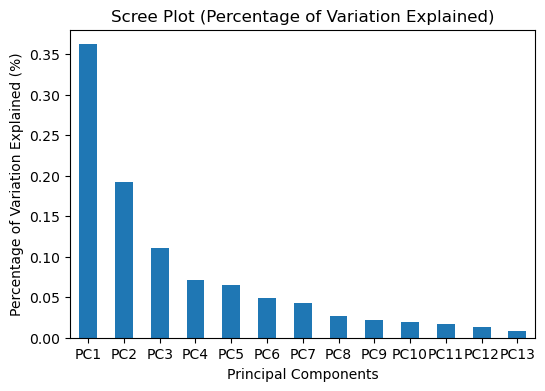

In [33]:
# Q4h
# Create a DataFrame for Scree Plot
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio'  : explained_variance_ratio
})

# Plot the Scree Plot using Seaborn
explained_variance_df.plot(
    x='Principal Component',
    y='Explained Variance Ratio',
    kind='bar',
    legend=False,
    figsize=(6,4))
plt.title('Scree Plot (Percentage of Variation Explained)')
plt.ylabel('Percentage of Variation Explained (%)')
plt.xlabel('Principal Components')
plt.xticks(rotation=0)
plt.show()

### Q5. 
Use the Diabetes dataset (`load_diabetes`) from `sklearn.datasets` for this question, where the objective is to predict the progression of the disease (`target`) based on all available features. Set all seed values and random_state to `1` for reproducibility where necessary. Where applicable, use `adam` as the optimizer, with a batch size of `32`, and epochs is `1000`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated. Where applicable for neural networks, ensure the data is suitably standardized.

##### (a) Perform a multiple linear regression on the entire dataset. Report the Mean Squared Error (MSE).
##### (b) Perform a multiple linear regression using 70% of the data for training and 30% for validation. Report the validation MSE.
##### (c) Use a neural network structure with 2 hidden layers, with each layer having 2 hidden nodes with the softplus activation function; having one node in the output layer with the linear activation function. Fit the model on the entire dataset and report the MSE.
##### (d) Using the same neural network architecture from `Q5c`, fit the model using 70% of the data for training and 30% for validation. Report the validation MSE.
##### (e) Use a neural network structure with 64 nodes in the first hidden layer and 32 nodes in the second hidden layer (both using softplus); having one node in the output layer with the linear activation function. Fit the model on the entire dataset and report the MSE.
##### (f) Using the same neural network architecture from `Q5e` but use 70% of the data for training and 30% for validation. Report the validation MSE.
##### (g) Using the same neural network architecture from `Q5e` but change the activation function to relu. Report the MSE.
##### (h) Using the same neural network architecture from `Q5g` but use 70% of the data for training and 30% for validation. Report the validation MSE.
##### (i) Without further calculations, which model from `Q5a` to `Q5h` performs the best? Explain your answer.
##### (j) Without further calculations, using the best model from `Q5i` to fit the entire dataset, what will the MSE be? Explain your answer.
##### (k) Without further calculations, which model from `Q5a` to `Q5h` performs the worst? Explain your answer. Suggest the problem that is causing the poor performance and identify ways to improve performance of this model.

In [31]:
# Q5 Load Libraries Here
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import random
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [32]:
# Q5a
# Load the Diabetes dataset
diabetes = load_diabetes()

# Select age, sex, BMI features as IVs and the target as the DV (ndarray)
X = diabetes.data
y = diabetes.target                     # Target: Disease progression

# Initialize and fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Fitted / Predicted y values
y_pred = model.predict(X)

# calculates MSE based on default formula, not regression MSE formula
mean_squared_error(y, y_pred)
# Answer: 2859.6963475867506

LinearRegression()

2859.6963475867506

In [33]:
# Q5b
# Split the data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and fit the multiple linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values for the validation set
y_pred = model.predict(X_val)

# Evaluate the model performance on the validation set, MSE
mean_squared_error(y_val, y_pred)
# Answer: 2827.084017424082

LinearRegression()

2827.084017424082

In [34]:
# Q5c
# Load the Diabetes dataset
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target                     

# Ensure reproducibility by setting a seed value
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

X.shape
# Define a simple neural network model
model = models.Sequential([
    layers.Input(shape=(10,)),               # Shape takes in a tuple, taking the value from X.shape[1]
    layers.Dense(2, activation='softplus'),  # First Hidden layer - "2" refers to the number of nodes in the layer
    layers.Dense(2, activation='softplus'),  # Second Hidden layer
    layers.Dense(1, activation='linear')     # Output layer
])

# Compile the model
# Use SGD (Stochastic Gradient Descent) optimizer with a learning rate of 0.1
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss function is mean squared error (MSE)
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=1000, batch_size=32, verbose=0)

# Display optimized weights and biases after training
# We loop through the layers to access their weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights for {layer.name}:\n{weights}\nBiases:\n{biases}")

# Predicted outputs based on our 3 inputs
print("Predicted Satisfaction:", model.predict(X))

# Evaluate the model and display final loss
loss = model.evaluate(X, y)
print(f"Final loss: {loss}")


# Answer: MSE = 2599.320068359375

(442, 10)

Weights for dense:
[[  8.150333   -10.377048  ]
 [  5.822292   -19.75292   ]
 [ 12.802337     0.049507  ]
 [  8.046068     0.87501115]
 [-26.023878   -24.791124  ]
 [ 18.692657    20.893757  ]
 [ 11.913298    -1.9741808 ]
 [  2.792197     3.3550923 ]
 [ 23.893356     7.2201953 ]
 [  4.19163     -3.710254  ]]
Biases:
[ 1.243239  -1.5423365]
Weights for dense_1:
[[ 5.737718   3.2760942]
 [11.649866   8.974252 ]]
Biases:
[ 4.036445 -5.615546]
Weights for dense_2:
[[7.552922 ]
 [2.8185894]]
Biases:
[8.048673]
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted Satisfaction: [[203.86107 ]
 [ 70.75644 ]
 [183.0001  ]
 [198.24628 ]
 [113.13491 ]
 [118.35945 ]
 [ 65.98477 ]
 [126.79052 ]
 [150.34882 ]
 [207.09152 ]
 [137.89934 ]
 [ 74.583084]
 [ 94.90895 ]
 [155.95834 ]
 [ 87.856316]
 [156.73936 ]
 [199.21101 ]
 [192.17484 ]
 [149.77962 ]
 [107.507706]
 [115.214745]
 [ 68.71327 ]
 [112.48072 ]
 [268.03787 ]
 [166.94153 ]
 [120.23033 ]
 [114.79269 ]
 [150.87672 ]
 [109.65588 ]
 [229.78072 ]
 [136

In [35]:
# Q5d
# Ensure reproducibility by setting a seed value
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

# Split the data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)


X.shape
# Define a simple neural network model
model = models.Sequential([
    layers.Input(shape=(10,)),               # Shape takes in a tuple, taking the value from X.shape[1]
    layers.Dense(2, activation='softplus'),  # First Hidden layer - "2" refers to the number of nodes in the layer
    layers.Dense(2, activation='softplus'),  # Second Hidden layer
    layers.Dense(1, activation='linear')     # Output layer
])

# Compile the model
# Use SGD (Stochastic Gradient Descent) optimizer with a learning rate of 0.1
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss function is mean squared error (MSE)
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

# Display optimized weights and biases after training
# We loop through the layers to access their weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights for {layer.name}:\n{weights}\nBiases:\n{biases}")

# Predicted outputs based on our 3 inputs
print("Predicted Satisfaction:", model.predict(X))

# Evaluate the model and display final loss
loss = model.evaluate(X_val, y_val)
print(f"Final loss: {loss}")


# Answer: MSE = 2609.61083984375

(442, 10)

Weights for dense_3:
[[ 11.1108265 -11.496596 ]
 [  4.750864  -13.339747 ]
 [ 16.573017   -0.7774155]
 [ 10.243784    0.1736658]
 [-19.068422  -23.56215  ]
 [ 14.509372   17.155706 ]
 [  8.856206   -0.5903184]
 [ -2.6271734   8.061398 ]
 [ 24.168234    4.5151973]
 [  3.2584646  -1.8588448]]
Biases:
[ 1.8213784  -0.73483276]
Weights for dense_4:
[[5.240946  2.0476806]
 [9.295167  6.437954 ]]
Biases:
[ 4.0794706 -5.4466033]
Weights for dense_5:
[[6.448976]
 [5.874219]]
Biases:
[5.116806]
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted Satisfaction: [[211.98419 ]
 [ 68.14664 ]
 [187.21211 ]
 [200.41924 ]
 [112.89791 ]
 [116.03452 ]
 [ 68.84619 ]
 [131.63828 ]
 [154.5356  ]
 [212.81544 ]
 [142.3324  ]
 [ 82.06701 ]
 [ 95.71743 ]
 [155.71236 ]
 [ 90.78269 ]
 [168.36807 ]
 [210.4955  ]
 [195.09727 ]
 [153.41351 ]
 [105.4875  ]
 [116.52871 ]
 [ 74.935486]
 [114.4624  ]
 [266.46912 ]
 [173.3     ]
 [135.37164 ]
 [123.967705]
 [161.16345 ]
 [109.123924]
 [234.82341 ]
 [142.94054 ]
 [ 70.30348

In [36]:
# Q5e
# Ensure reproducibility by setting a seed value
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

X.shape
# Define a simple neural network model
model = models.Sequential([
    layers.Input(shape=(10,)),               # Shape takes in a tuple, taking the value from X.shape[1]
    layers.Dense(64, activation='softplus'),  # First Hidden layer - "2" refers to the number of nodes in the layer
    layers.Dense(32, activation='softplus'),  # Second Hidden layer
    layers.Dense(1, activation='linear')     # Output layer
])

# Compile the model
# Use SGD (Stochastic Gradient Descent) optimizer with a learning rate of 0.1
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss function is mean squared error (MSE)
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=1000, batch_size=32, verbose=0)

# Display optimized weights and biases after training
# We loop through the layers to access their weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights for {layer.name}:\n{weights}\nBiases:\n{biases}")

# Predicted outputs based on our 3 inputs
print("Predicted Satisfaction:", model.predict(X))

# Evaluate the model and display final loss
loss = model.evaluate(X, y)
print(f"Final loss: {loss}")
# Answer: MSE = 683.6085815429688

(442, 10)

Weights for dense_6:
[[ 1.50029552e+00  6.35193825e-01  1.73200703e+01  1.29247484e+01
   3.45830498e+01 -3.53735018e+00 -1.95115681e+01 -1.75648260e+00
  -1.72486954e+01  1.29117596e+00 -1.00636137e+00 -2.46900215e+01
  -8.71763229e-01 -4.18596774e-01 -1.74391642e-01  7.67982781e-01
  -2.67486000e+01  6.54485166e-01 -3.43002167e+01 -3.70962029e+01
  -3.22894311e+00 -4.79976177e+00 -3.77218843e-01  9.86398101e-01
   1.61648071e+00 -2.98661613e+00  2.54150701e+00  4.22506561e+01
   2.49068356e+00 -6.14053547e-01 -1.64670677e+01 -9.49801147e-01
   5.18643475e+00  1.51446056e+00 -4.18891430e+00 -4.60057640e+00
  -6.92758024e-01  1.84793625e+01  5.30995369e+01  1.24489546e+00
  -1.81053519e+00  2.45630831e-01 -1.33881176e+00 -1.48966564e-02
   5.47350273e+01  8.47412765e-01 -1.68183580e-01  4.22413111e-01
  -1.09814816e+01  1.91559772e+01  1.03350914e+00  6.81639552e-01
   4.90955391e+01  3.63888097e+00  4.02571869e+00  5.63952565e-01
   1.19090385e+01  8.59590530e+00  2.56080770e+00 -1.08

In [37]:
# Q5f
# Ensure reproducibility by setting a seed value
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

X.shape
# Define a simple neural network model
model = models.Sequential([
    layers.Input(shape=(10,)),               # Shape takes in a tuple, taking the value from X.shape[1]
    layers.Dense(64, activation='softplus'),  # First Hidden layer - "2" refers to the number of nodes in the layer
    layers.Dense(32, activation='softplus'),  # Second Hidden layer
    layers.Dense(1, activation='linear')     # Output layer
])

# Compile the model
# Use SGD (Stochastic Gradient Descent) optimizer with a learning rate of 0.1
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss function is mean squared error (MSE)
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0,validation_data=(X_val, y_val))

# Display optimized weights and biases after training
# We loop through the layers to access their weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights for {layer.name}:\n{weights}\nBiases:\n{biases}")

# Predicted outputs based on our 3 inputs
print("Predicted Satisfaction:", model.predict(X_val))

# Evaluate the model and display final loss
loss = model.evaluate(X_val, y_val)
print(f"Final loss: {loss}")

# Answer: MSE = 5937.86572265625

(442, 10)

Weights for dense_9:
[[ 3.08079624e+01 -2.73910069e+00  1.60493374e+01 -1.09982717e+00
  -1.63366318e+00  2.42836070e+00 -2.05399799e+00 -2.38959446e+01
  -1.30163422e+01 -8.34072709e-01 -2.34344997e+01 -1.28759422e+01
  -3.57861304e+00  1.10463438e+01 -2.93946838e+00  8.95735443e-01
  -2.06071639e+00 -1.90927494e+00  2.22619190e+01 -2.62259483e+00
  -1.55353870e+01 -2.41840553e+00  1.95073280e+01  2.31437206e+01
  -2.90147114e+00 -2.85308385e+00 -1.90891337e+00 -2.94764638e+00
  -4.43710613e+00 -1.78214037e+00 -4.68839798e+01 -3.71165514e+00
  -2.51848984e+01 -7.56906128e+00  8.67063999e-01 -2.79306149e+00
  -1.14206350e+00 -2.52221775e+00 -2.47333598e+00 -2.75417829e+00
   5.99743032e+00 -3.12087393e+00  4.69424903e-01  2.68983536e+01
  -2.21748734e+00 -2.41496181e+00 -3.20732665e+00  2.52916050e+01
  -2.12036419e+01 -3.38564587e+00 -2.52517033e+00 -2.57361507e+01
  -3.38249660e+00 -2.64510345e+01  1.40333867e+00  5.85436401e+01
  -2.31505227e+00 -2.70492673e+00 -4.16469479e+00  5.38

In [38]:
# Q5g
# Ensure reproducibility by setting a seed value
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

X.shape
# Define a simple neural network model
model = models.Sequential([
    layers.Input(shape=(10,)),               # Shape takes in a tuple, taking the value from X.shape[1]
    layers.Dense(64, activation='relu'),  # First Hidden layer - "2" refers to the number of nodes in the layer
    layers.Dense(32, activation='relu'),  # Second Hidden layer
    layers.Dense(1, activation='linear')     # Output layer
])

# Compile the model
# Use SGD (Stochastic Gradient Descent) optimizer with a learning rate of 0.1
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss function is mean squared error (MSE)
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=1000, batch_size=32, verbose=0)

# Display optimized weights and biases after training
# We loop through the layers to access their weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights for {layer.name}:\n{weights}\nBiases:\n{biases}")

# Predicted outputs based on our 3 inputs
print("Predicted Satisfaction:", model.predict(X))

# Evaluate the model and display final loss
loss = model.evaluate(X, y)
print(f"Final loss: {loss}")
# Answer: MSE = 329.1993408203125

(442, 10)

Weights for dense_12:
[[ -0.7377799   -0.39411184  19.458593   -15.806405   -14.581617
   -0.82231504  20.887493   -27.642757    -3.0746956   -8.226746
   -0.516851     0.38510305  -0.53199375   0.51538587  -0.5840107
   -6.2575765    0.5476379  -12.190161   -42.59925      5.6756616
    0.38729015   7.0112686   -0.5287246   -7.8463182   -0.4822785
   -6.8914986   -0.38161314  -0.7331786    0.4172039  -23.820515
    0.36077347  -0.46337843  -0.5856134  -23.962582     0.3384138
  -20.24541      2.3902977   -0.5557763   -0.39954177  -0.4792009
  -13.390551     0.525789   -14.533526   -33.77426    -12.368901
   31.2163     -25.843084    -8.990138    -0.349617    15.214125
   -1.7424487   -0.42081988  -7.36887      0.47624552  13.807324
   20.159988   -27.646725     1.1244016    0.34809792  -0.6013013
   -0.5715339   -0.5746428  -15.659237    -0.43143046]
 [  0.5502415    0.32565665   9.549142   -10.366714    19.49548
    0.87390184 -18.023548    -9.080023    21.652512   -24.94908
    0.659

In [39]:
# Q5h
# Ensure reproducibility by setting a seed value
random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)

X.shape
# Define a simple neural network model
model = models.Sequential([
    layers.Input(shape=(10,)),               # Shape takes in a tuple, taking the value from X.shape[1]
    layers.Dense(64, activation='relu'),  # First Hidden layer - "64" refers to the number of nodes in the layer
    layers.Dense(32, activation='relu'),  # Second Hidden layer
    layers.Dense(1, activation='linear')     # Output layer
])

# Compile the model
# Use SGD (Stochastic Gradient Descent) optimizer with a learning rate of 0.1
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss function is mean squared error (MSE)
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

# Display optimized weights and biases after training
# We loop through the layers to access their weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights for {layer.name}:\n{weights}\nBiases:\n{biases}")

# Predicted outputs based on our 3 inputs
print("Predicted Satisfaction:", model.predict(X_train))

# Evaluate the model and display final loss
loss = model.evaluate(X_val, y_val)
print(f"Final loss: {loss}")

# Answer: MSE = 6401.43115234375

(442, 10)

Weights for dense_15:
[[ -0.7377647   -0.3941263   18.834587    19.503883   -15.705742
   -0.82217145 -13.4601555   -0.39040142  17.400562     4.2409744
   -0.51686174   2.3661985   -0.53199154 -15.179195    -0.5840072
   -2.9787762   -0.7108007    1.1617513   11.909733    28.44149
    0.387272    -5.478791     4.634332     1.1509286   -0.4822696
    3.9595146   -0.3816112   -0.7331869    0.41718146  16.146996
    0.36075586  -0.46329996  -0.5856502   -0.84553677  -0.8622635
   16.06386     -6.120511     0.6452793   -0.39952958  -0.47920206
   -0.5066922   -0.6752539  -10.0176      -5.2027535    0.04317341
  -14.450044    11.915142    -0.63584703 -11.907532    -0.35718626
   17.929276     0.7802328   -0.48482153  -0.72475517   2.2581136
   -0.24861741  18.650192    19.325083    -0.85294735  -5.6945934
   -0.571492    -0.5746376   11.748355    -0.43135083]
 [  0.55022544   0.3256569    6.6849375   -5.303076    -4.4012685
    0.8738494  -25.980906   -15.207723     4.475561     9.64948
  

In [ ]:
# Q5i

# Answer: To confirm if what was done above is correct b4 answering i,j,k

In [ ]:
# Q5j

# Answer:

In [ ]:
# Q5k

# Answer:

### Q6.
Developing effective practice questions and solutions is a key indicator of topic mastery. This question requires you to create an assignment question based on any materials covered in `Lectures 1 to 6` and provide a corresponding solution.

Marks will be awarded based on following:
  - Clarity: Ensure the question is clearly and concisely phrased, leaving no ambiguity for the student. 
  - Accuracy: The solution provided must be correct and aligned with the concepts taught in the lectures.
  - Structured Solution: The solution must be well-structured, showing logical steps from problem statement to final answer.
  - Relevance: The question must focus on topics covered in `Lectures 1 to 6`.
  - Creativity: Questions should be novel and demonstrate depth in understanding. Avoid replicating questions shown in the course.

In [ ]:
# Q6 Answer here


### Q7.
Developing effective practice questions and solutions is a key indicator of topic mastery. This question requires you to create an assignment question based on any materials covered in `Lectures 7 to 12` and provide a corresponding solution.

Marks will be awarded based on following:
  - Clarity: Ensure the question is clearly and concisely phrased, leaving no ambiguity for the student. 
  - Accuracy: The solution provided must be correct and aligned with the concepts taught in the lectures.
  - Structured Solution: The solution must be well-structured, showing logical steps from problem statement to final answer.
  - Relevance: The question must focus on topics covered in `Lectures 7 to 12`.
  - Creativity: Questions should be novel and demonstrate depth in understanding. Avoid replicating questions shown in the course.

Question:

Use the Digits dataset (`load_digits`) from `sklearn.datasets` for this question, the objective is to predict the `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `30`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.

##### (a) Use the entire dataset to generate a simple decision tree with a maximum depth of 2. Calculate the MSE and explain why at times, max_depth is used and the potential problems.
##### (b) Visualize the tree structure and its decision boundaries. calculate the Sum Squared Residuals (SSR) at the leaf node (i.e. terminal node). 
##### (c) Use a validation approach where 80% of the data is used for training and 20% is used for validation. Use cost complexity pruning to obtain a sequence of ccp_alphas (i.e. the sequence of alphas that define each pruned subtree) and perform cost complexity pruning (using 5 fold cross validation) to identify the optimal alpha which minimizes the MSE. Using the optimal alpha, prune the decision tree and evaluate its performance on the validation set. Report the optimal alpha and the validation MSE. 
##### (d) Repeat part (c) here but utilising `GridSearchCV` from `sklearn.model_selection` and `Pipeline` `sklearn.pipeline`, instead of the for loop method taught in class. Check that the alpha value and MSE matches part c.
##### (e) Refit and visualize the final decision tree using the entire dataset with the optimal alpha. 

DecisionTreeRegressor(max_depth=2, random_state=30)

Mean Squared Error with max_depth=2: 6.0497799787188855


<Figure size 2000x1000 with 0 Axes>

[Text(0.5, 0.8333333333333334, 'pixel_6_4 <= 5.5\nsquared_error = 8.205\nsamples = 1797\nvalue = 4.491'),
 Text(0.25, 0.5, 'pixel_3_5 <= 12.5\nsquared_error = 6.136\nsamples = 508\nvalue = 6.098'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 5.826\nsamples = 358\nvalue = 5.352'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2.372\nsamples = 150\nvalue = 7.88'),
 Text(0.75, 0.5, 'pixel_4_4 <= 0.5\nsquared_error = 7.601\nsamples = 1289\nvalue = 3.857'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 7.745\nsamples = 191\nvalue = 1.387'),
 Text(0.875, 0.16666666666666666, 'squared_error = 6.33\nsamples = 1098\nvalue = 4.287')]

Text(0.5, 1.0, 'Decision Tree for load_digits Dataset (max_depth=2)')

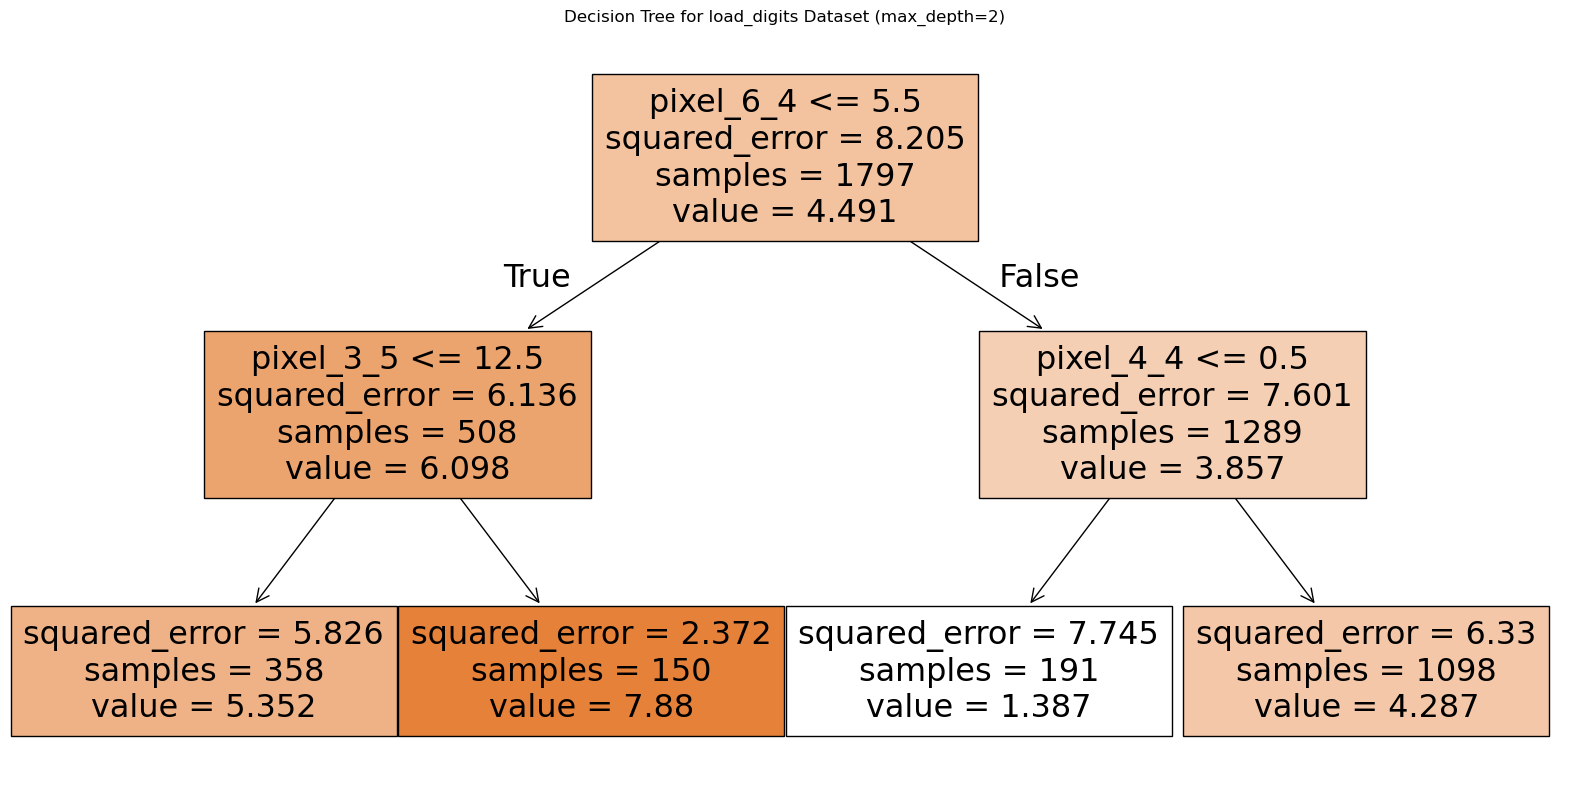

SSR of terminal node = 10871.143
Optimal alpha: 0.0248533651456408


DecisionTreeRegressor(ccp_alpha=0.0248533651456408, random_state=30)

MSE with pruning: 2.46


GridSearchCV(cv=KFold(n_splits=5, random_state=30, shuffle=True),
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeRegressor(random_state=30))]),
             param_grid={'dt__ccp_alpha': array([0.00000000e+00, 3.47947112e-04, 3.47947112e-04, 3.47947112e-04,
       4.63929483e-04, 4.63929483e-04, 4.63929483e-04, 4.63929483e-04,
       4.63929483e-04, 4.63929483e-04, 4.63929483e-04, 5.21920668e-0...
       5.88230623e-02, 5.90964692e-02, 6.11961150e-02, 6.85854558e-02,
       7.42015736e-02, 7.52853189e-02, 7.99970123e-02, 8.33763284e-02,
       8.35741348e-02, 9.01686793e-02, 1.18269828e-01, 1.45839259e-01,
       1.61250934e-01, 1.64174443e-01, 1.74183201e-01, 3.62990759e-01,
       4.16320631e-01, 4.36864007e-01, 4.45801438e-01, 4.77401765e-01,
       6.40202650e-01, 9.84954043e-01])},
             scoring='neg_mean_squared_error')

Optimal alpha: 0.0248533651456408


DecisionTreeRegressor(ccp_alpha=0.0248533651456408, random_state=30)

MSE with pruning: 2.46


DecisionTreeRegressor(ccp_alpha=0.0248533651456408, random_state=30)

<Figure size 2000x1000 with 0 Axes>

[Text(0.35284514925373134, 0.95, 'pixel_6_4 <= 5.5\nsquared_error = 8.205\nsamples = 1797\nvalue = 4.491'),
 Text(0.1791044776119403, 0.85, 'pixel_3_5 <= 12.5\nsquared_error = 6.136\nsamples = 508\nvalue = 6.098'),
 Text(0.2659748134328358, 0.8999999999999999, 'True  '),
 Text(0.11940298507462686, 0.75, 'pixel_4_3 <= 1.5\nsquared_error = 5.826\nsamples = 358\nvalue = 5.352'),
 Text(0.05970149253731343, 0.65, 'pixel_4_1 <= 1.5\nsquared_error = 9.651\nsamples = 66\nvalue = 2.985'),
 Text(0.029850746268656716, 0.55, 'pixel_3_6 <= 3.0\nsquared_error = 6.673\nsamples = 38\nvalue = 4.895'),
 Text(0.014925373134328358, 0.45, 'squared_error = 1.891\nsamples = 29\nvalue = 3.621'),
 Text(0.04477611940298507, 0.45, 'squared_error = 0.0\nsamples = 9\nvalue = 9.0'),
 Text(0.08955223880597014, 0.55, 'pixel_4_4 <= 0.5\nsquared_error = 2.024\nsamples = 28\nvalue = 0.393'),
 Text(0.07462686567164178, 0.45, 'squared_error = 0.0\nsamples = 26\nvalue = 0.0'),
 Text(0.1044776119402985, 0.45, 'squared_error

Text(0.5, 1.0, 'Final Decision Tree for California housing Dataset')

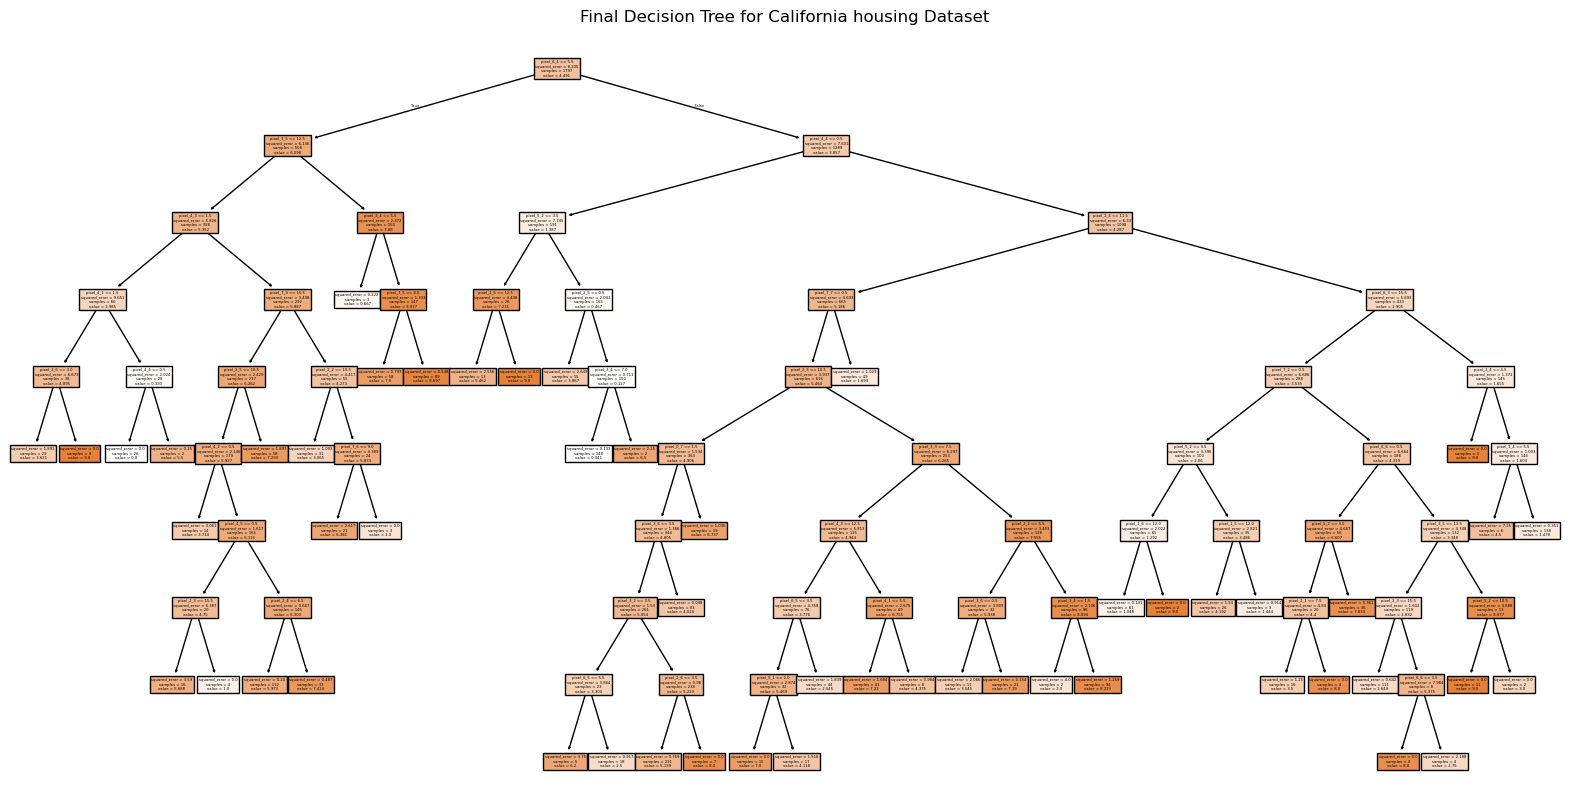

In [40]:
# Q7 Answer here
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data = load_digits()

X = data.data
y = data.target  

# Initialize and Fit the Decision Tree regressor with max_depth of 2
tree_model = DecisionTreeRegressor(max_depth=2, random_state=30)       
                                                                       
tree_model.fit(X, y)

# Make predictions using the trained model
y_pred = tree_model.predict(X)

# Part (a) Find MSE and explain the purpose of including a stopping mechanism such as max_depth.
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error with max_depth=2: {mse}")
# Answer: MSE is 6.0497799787188855. ; The purpose of including a max depth is to do pre-pruning

# Part (b) Visualize the decision tree and calculate the SSR of the terminal node
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=data.feature_names, filled=True)    # filled = True adds color, where color intensity increases with the mean response value
plt.title("Decision Tree for load_digits Dataset (max_depth=2)")
plt.show()

SSR = (5.826*358)+(2.372*150)+(7.745*191)+(6.33*1098)
print(f"SSR of terminal node = {SSR}")
# Answer: SSR of terminal node = 10871.143

# Part (c) Do a Random Forest Model pruned and find the most important variable using np.argmax
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_text

# Step 1: Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=30
)

# Step 2 & 3: Get a sequence of subtrees
# Define your Decision Tree
model_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30)

# Use cost complexity pruning and get sequence of alphas
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # effective alphas of each subtree    # Your set of alphas to test

# Define the Decision Tree for each alpha
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=ccp_alpha)
    trees.append(clf)

# Step 4: Use K-fold cross-validation to choose the best alpha
kf = KFold(n_splits=5, shuffle=True, random_state=30)
mean_cv_errors = []

for clf in trees:
    # Perform cross-validation and get the average error for each alpha
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_cv_errors.append(np.mean(cv_scores))  # Get average MSE for each alpha

# Step 5: Find the optimal alpha (the one that maximizes the cross-validated accuracy)
optimal_alpha_index = np.argmax(mean_cv_errors)
optimal_alpha = ccp_alphas[optimal_alpha_index]
print(f"Optimal alpha: {optimal_alpha}")

# Step 6: Prune the tree using the optimal alpha on the training set
pruned_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Step 7: Evaluate the pruned tree on the validation set
y_pred_pruned = pruned_tree.predict(X_val)
# Step 7: Evaluate the pruned tree on the validation set
print(f"MSE with pruning: {mean_squared_error(y_val, y_pred_pruned):.2f}")

# Part (d)
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import numpy as np

# Step 2: Setup the pipeline with a decision tree
pipeline = Pipeline([
    ('dt', DecisionTreeRegressor(criterion='squared_error', random_state=30))
])

# Step 3: Define the parameter grid, including a range of ccp_alpha values
model_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30)
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

param_grid = {
    'dt__ccp_alpha': ccp_alphas
}

# Step 4: Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=30), scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Step 5: Get the best alpha and its corresponding score
optimal_alpha = grid_search.best_params_['dt__ccp_alpha']
best_score = grid_search.best_score_

print(f"Optimal alpha: {optimal_alpha}")

pruned_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

y_pred_pruned = pruned_tree.predict(X_val)
# Step 7: Evaluate the pruned tree on the validation set
print(f"MSE with pruning: {mean_squared_error(y_val, y_pred_pruned):.2f}")


# Part (e)
final_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=optimal_alpha)
final_tree.fit(X, y)


# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(final_tree, feature_names=data.feature_names, filled=True)
plt.title("Final Decision Tree for California housing Dataset")
plt.show()